<img src="https://www.bbva.com/wp-content/uploads/2019/11/machine-learning-1024x629.jpg">

<h1>Machine Learning<span class="tocSkip"></span></h1>



# Import

## Libraries

In [1]:
import src.limpieza as lm
import pandas as pd
import numpy as np
import pickle
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## Machine learning libraries

In [2]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

## Dataframe

In [3]:
data = pd.read_csv("data/Machine_learning/casas_train.csv")
data.dtypes

Unnamed: 0              int64
sq_mt_built           float64
sq_mt_useful          float64
n_rooms                 int64
n_bathrooms           float64
floor                 float64
is_new_development      int64
is_renewal_needed       int64
has_parking             int64
is_exterior             int64
tipo                  float64
barrio_pm2            float64
e_certificate           int64
rent_price              int64
buy_price               int64
dtype: object

In [4]:
#data["m2_x_pm2"] = data.sq_mt_built * data.barrio_pm2 * 1000

In [5]:
casas = data.drop("Unnamed: 0",axis=1)

# Correlated columns

In [6]:
casas.head()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,rent_price,buy_price
0,110.0,93.50,3,2.0,5.0,0,0,0,1,0.0,4.44830,5,1756,539000
1,50.0,42.50,2,1.0,2.0,0,1,0,1,0.0,4.01576,4,798,165000
2,103.0,87.55,2,2.0,4.0,0,0,0,1,0.0,4.25584,0,1551,449000
3,174.0,143.00,5,2.0,4.0,0,1,1,1,0.0,4.24658,0,1989,640000
4,79.0,67.15,1,1.0,1.0,0,0,0,1,0.0,4.80769,0,1781,550000


<AxesSubplot:>

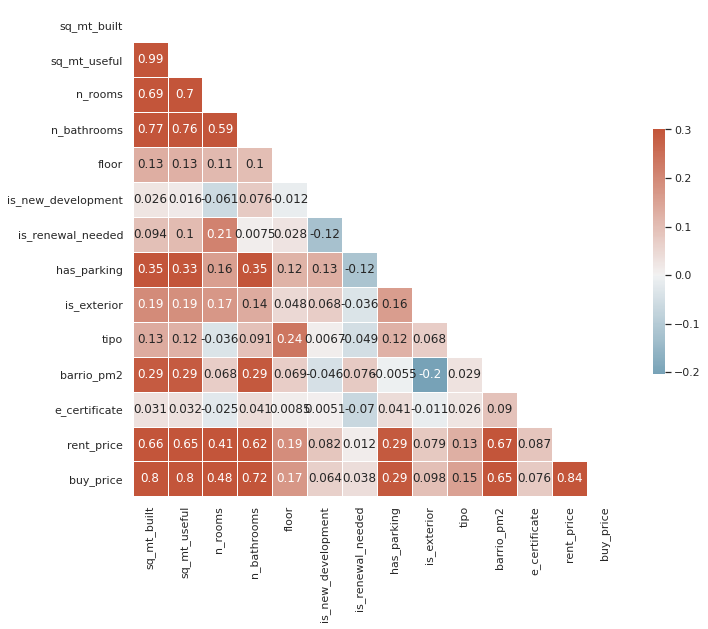

In [7]:
lm.heat_map_triangle(casas)

As I predicted in the cleaning jupyter, the columns useful square meters and built square meters are highly correlated so we must remove one of the two.

In [8]:
casas2 = casas.drop(["sq_mt_useful"], axis=1)

<AxesSubplot:>

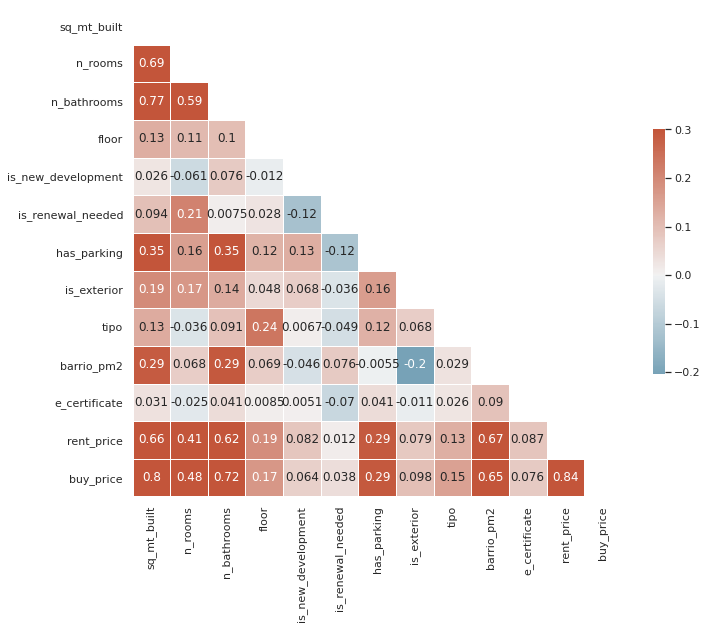

In [9]:
lm.heat_map_triangle(casas2)

In [10]:
casas2

,sq_mt_built,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,rent_price,buy_price
0,110.0,3,2.0,5.0,0,0,0,1,0.0,4.44830,5,1756,539000
1,50.0,2,1.0,2.0,0,1,0,1,0.0,4.01576,4,798,165000
2,103.0,2,2.0,4.0,0,0,0,1,0.0,4.25584,0,1551,449000
3,174.0,5,2.0,4.0,0,1,1,1,0.0,4.24658,0,1989,640000
4,79.0,1,1.0,1.0,0,0,0,1,0.0,4.80769,0,1781,550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14426,75.0,3,1.0,1.0,0,0,0,1,0.0,3.53607,0,1142,277500
14427,58.0,3,1.0,2.0,0,1,0,1,0.0,2.57887,3,688,135500
14428,112.0,2,2.0,1.0,0,0,0,1,0.0,3.15253,0,1311,345000
14429,108.0,4,1.0,2.0,0,0,0,1,0.0,3.34109,3,1161,285000


# Best columns

In [11]:
results = smf.ols("buy_price ~ sq_mt_built + n_rooms + n_bathrooms + floor + is_new_development + is_renewal_needed + has_parking + is_exterior + tipo + e_certificate  + barrio_pm2 ", data = casas2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     8028.
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        16:14:35   Log-Likelihood:            -1.8757e+05
No. Observations:               14431   AIC:                         3.752e+05
Df Residuals:                   14419   BIC:                         3.753e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.841e+05   4538.561    -84.638      0.000   -3.93e+05   -3.75e+05
sq_mt_built         2815.6910     30.503     92.310      0.000    2755.902    2875.480
n_rooms            -5249.9741   1216.552     -4.315      0.000   -7634.573   -2865.376
n_bathrooms         5.357e+04   1816.588     29.492      0.000       5e+04    5.71e+04
floor               6015.2465    454.011     13.249      0.000    5125.326    6905.167
is_new_development   5.68e+04   3801.613     14.942      0.000    4.94e+04    6.43e+04
is_renewal_needed  -2.372e+04   2379.986     -9.966      0.000   -2.84e+04   -1.91e+04
has_parking         1.447e+04   2177.950      6.645      0.000    1.02e+04    1.87e+04
is_exterior         5.452e+04   3130.202     17.417      0.000    4.84e+04    6.07e+04
tipo                2.182e+04   2085.268     10.464      0.000    1.77e+04    2.59e+04
e_certificate       1093.9883    484.625      2.257      0.024     144.061    2043.915
barrio_pm2          9.662e+04    744.381    129.798      0.000    9.52e+04    9.81e+04
==============================================================================
Omnibus:                     2664.484   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33244.958
Skew:                           0.519   Prob(JB):                         0.00
Kurtosis:                      10.363   Cond. No.                         687.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
col3 = ['sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_new_development', 'is_renewal_needed','has_parking', 'is_exterior', 'tipo','barrio_pm2', 'e_certificate', "buy_price"]

# Train-Test-Split

In [13]:
modelo = casas2

In [14]:
X = modelo.drop("buy_price", axis=1)
y = modelo.buy_price

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
X_train.shape

(11544, 12)

In [17]:
X_test.shape

(2887, 12)

In [18]:
y_train.shape

(11544,)

In [19]:
y_test.shape

(2887,)

# Train models

In [20]:
models = {"ridge":Ridge(),
         "lasso":Lasso(),
         "sgd":SGDRegressor(),
         "KNN":KNeighborsRegressor(),
         "gradient":GradientBoostingRegressor(),
          "Rfr" : RandomForestRegressor(),
          "Decision Tree" : DecisionTreeRegressor(max_depth=7),
          #"XGBoost" : XGBRegressor(),
          
         }

In [21]:

dicc= {}

for name, model in models.items():
    dicc_metrics = {}
    
    print(f"Trainning model -----> {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    dicc_metrics["MAE"] = metrics.mean_absolute_error(y_test, y_pred)
    dicc_metrics["MSE"] = metrics.mean_squared_error(y_test,y_pred)
    dicc_metrics["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    dicc_metrics["R2_score"] = metrics.r2_score(y_true=y_test,y_pred=y_pred)
    
    dicc[name] = dicc_metrics
    
    print("Model finished")
metricas = pd.DataFrame(dicc)
metricas

Trainning model -----> ridge
Model finished
Trainning model -----> lasso
Model finished
Trainning model -----> sgd
Model finished
Trainning model -----> KNN
Model finished
Trainning model -----> gradient
Model finished
Trainning model -----> Rfr
Model finished
Trainning model -----> Decision Tree
Model finished


,ridge,lasso,sgd,KNN,gradient,Rfr,Decision Tree
MAE,6.251265e+04,6.251596e+04,4.344184e+14,1.495553e+04,1.995469e+04,5.889666e+03,1.636069e+04
MSE,1.012598e+10,1.012607e+10,2.232597e+29,5.430699e+09,2.418488e+09,1.367884e+09,2.790209e+09
RMSE,1.006279e+05,1.006284e+05,4.725037e+14,7.369327e+04,4.917812e+04,3.698491e+04,5.282243e+04
R2_score,8.723091e-01,8.723081e-01,-2.815354e+18,9.315177e-01,9.695023e-01,9.827507e-01,9.648148e-01


Best models to predict the diamond price are **###** and **###** 

# Max depth

In [22]:
results = []

for depth in range(1, 25):
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    result = {
        "depth": depth,
        "train_error": metrics.mean_squared_error(y_train, model.predict(X_train)),
        "test_error": metrics.mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [23]:
results_df = pd.DataFrame(results)

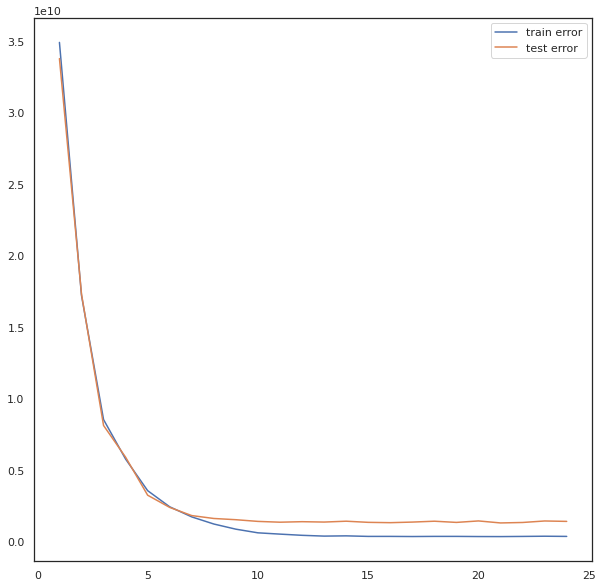

In [24]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

# Parameter Tuning
Now that we have found the most efficient model, let's try the different `hyperparameters` to improve it.



In [25]:
gs = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        "max_depth": [6,7,8,9],
        "max_features": [0.65,.75,0.8,.9,1],
        "min_samples_split": [2,3,5]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [26]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END max_depth=6, max_features=0.65, min_samples_split=2; total time=   0.6s
[CV 2/5] END max_depth=6, max_features=0.65, min_samples_split=2; total time=   0.6s
[CV 3/5] END max_depth=6, max_features=0.65, min_samples_split=2; total time=   0.6s
[CV 4/5] END max_depth=6, max_features=0.65, min_samples_split=2; total time=   0.6s
[CV 5/5] END max_depth=6, max_features=0.65, min_samples_split=2; total time=   0.6s
[CV 1/5] END max_depth=6, max_features=0.65, min_samples_split=3; total time=   0.6s
[CV 2/5] END max_depth=6, max_features=0.65, min_samples_split=3; total time=   0.7s
[CV 3/5] END max_depth=6, max_features=0.65, min_samples_split=3; total time=   0.6s
[CV 4/5] END max_depth=6, max_features=0.65, min_samples_split=3; total time=   0.7s
[CV 5/5] END max_depth=6, max_features=0.65, min_samples_split=3; total time=   0.7s
[CV 1/5] END max_depth=6, max_features=0.65, min_samples_split=5; total time=   0.6s
[CV

[CV 3/5] END max_depth=7, max_features=0.75, min_samples_split=3; total time=   0.8s
[CV 4/5] END max_depth=7, max_features=0.75, min_samples_split=3; total time=   0.8s
[CV 5/5] END max_depth=7, max_features=0.75, min_samples_split=3; total time=   0.8s
[CV 1/5] END max_depth=7, max_features=0.75, min_samples_split=5; total time=   0.8s
[CV 2/5] END max_depth=7, max_features=0.75, min_samples_split=5; total time=   0.8s
[CV 3/5] END max_depth=7, max_features=0.75, min_samples_split=5; total time=   0.8s
[CV 4/5] END max_depth=7, max_features=0.75, min_samples_split=5; total time=   0.8s
[CV 5/5] END max_depth=7, max_features=0.75, min_samples_split=5; total time=   0.8s
[CV 1/5] END max_depth=7, max_features=0.8, min_samples_split=2; total time=   0.8s
[CV 2/5] END max_depth=7, max_features=0.8, min_samples_split=2; total time=   0.8s
[CV 3/5] END max_depth=7, max_features=0.8, min_samples_split=2; total time=   0.8s
[CV 4/5] END max_depth=7, max_features=0.8, min_samples_split=2; tot

[CV 1/5] END max_depth=8, max_features=0.9, min_samples_split=2; total time=   1.0s
[CV 2/5] END max_depth=8, max_features=0.9, min_samples_split=2; total time=   1.0s
[CV 3/5] END max_depth=8, max_features=0.9, min_samples_split=2; total time=   1.0s
[CV 4/5] END max_depth=8, max_features=0.9, min_samples_split=2; total time=   1.0s
[CV 5/5] END max_depth=8, max_features=0.9, min_samples_split=2; total time=   1.0s
[CV 1/5] END max_depth=8, max_features=0.9, min_samples_split=3; total time=   1.1s
[CV 2/5] END max_depth=8, max_features=0.9, min_samples_split=3; total time=   1.0s
[CV 3/5] END max_depth=8, max_features=0.9, min_samples_split=3; total time=   1.0s
[CV 4/5] END max_depth=8, max_features=0.9, min_samples_split=3; total time=   1.0s
[CV 5/5] END max_depth=8, max_features=0.9, min_samples_split=3; total time=   1.0s
[CV 1/5] END max_depth=8, max_features=0.9, min_samples_split=5; total time=   1.0s
[CV 2/5] END max_depth=8, max_features=0.9, min_samples_split=5; total time=

[CV 4/5] END max_depth=9, max_features=1, min_samples_split=3; total time=   0.3s
[CV 5/5] END max_depth=9, max_features=1, min_samples_split=3; total time=   0.3s
[CV 1/5] END max_depth=9, max_features=1, min_samples_split=5; total time=   0.3s
[CV 2/5] END max_depth=9, max_features=1, min_samples_split=5; total time=   0.3s
[CV 3/5] END max_depth=9, max_features=1, min_samples_split=5; total time=   0.4s
[CV 4/5] END max_depth=9, max_features=1, min_samples_split=5; total time=   0.3s
[CV 5/5] END max_depth=9, max_features=1, min_samples_split=5; total time=   0.3s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9],
                         'max_features': [0.65, 0.75, 0.8, 0.9, 1],
                         'min_samples_split': [2, 3, 5]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [27]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]
grid_search_results["diferencia"] = grid_search_results["mean_test_score"] - grid_search_results["mean_train_score"]

In [33]:
grid_search_results.sort_values("mean_test_score", ascending=False).head(15)

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,mean_train_score,diferencia
45,9,0.65,2,-2.275533e+09,-8.558189e+08,-1.419714e+09
46,9,0.65,3,-2.313947e+09,-8.789825e+08,-1.434964e+09
51,9,0.8,2,-2.321387e+09,-7.567659e+08,-1.564622e+09
47,9,0.65,5,-2.327719e+09,-9.812249e+08,-1.346494e+09
49,9,0.75,3,-2.365061e+09,-8.010995e+08,-1.563962e+09
50,9,0.75,5,-2.366548e+09,-8.887021e+08,-1.477846e+09
48,9,0.75,2,-2.366617e+09,-7.476640e+08,-1.618953e+09
52,9,0.8,3,-2.398514e+09,-8.008762e+08,-1.597638e+09
53,9,0.8,5,-2.427950e+09,-8.999830e+08,-1.527967e+09
55,9,0.9,3,-2.430277e+09,-7.950559e+08,-1.635221e+09


In [31]:
best_tree = gs.best_estimator_
best_tree

RandomForestRegressor(max_depth=9, max_features=0.65)

In [36]:
best_tree = RandomForestRegressor(max_depth=8, max_features=0.8, min_samples_split=2 )

# Best Hyperparameters

In [30]:
stop

NameError: name 'stop' is not defined

In [82]:
pickle.dump(best_tree,open("Tools/parameters/rfr_md9_mf065_ms2", "wb"))

# Test model
Once we have our model, its time to test it.

In [83]:
# load the model from disk
best_tree = pickle.load(open("Tools/parameters/rfr_md8_mf08_ms3", 'rb'))
best_tree

RandomForestRegressor(max_depth=8, max_features=0.8, min_samples_split=3)

In [101]:
best_tree.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=0.8, min_samples_split=3)

In [103]:
pickle.dump(best_tree,open("Tools/parameters/rfr_md8_mf08_ms3_fun", "wb"))

In [85]:
metrics.mean_squared_error(best_tree.predict(X_test),y_test)

1397868042.9259083

In [86]:
np.sqrt(metrics.mean_squared_error(best_tree.predict(X_test),y_test)).round(5)

37388.07354

In [87]:
casas.head()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,rent_price,buy_price
0,110.0,93.50,3,2.0,5.0,0,0,0,1,0.0,4.44830,5,1756,539000
1,50.0,42.50,2,1.0,2.0,0,1,0,1,0.0,4.01576,4,798,165000
2,103.0,87.55,2,2.0,4.0,0,0,0,1,0.0,4.25584,0,1551,449000
3,174.0,143.00,5,2.0,4.0,0,1,1,1,0.0,4.24658,0,1989,640000
4,79.0,67.15,1,1.0,1.0,0,0,0,1,0.0,4.80769,0,1781,550000


# Second Test
In the jupyter above we split the data in two, keeping 10% percent of the data to test with the final model, so that we have two tests, the original model and an extra one, as if they were new values.

In [88]:
prueba = pd.read_csv("data/Machine_learning/Test/casas_test.csv")
prueba = prueba.drop("Unnamed: 0",axis=1)
prueba.head()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,rent_price,buy_price
0,143.0,120.00,4,2.0,7.0,0,0,1,1,0.0,4.09870,7,2230,748000
1,159.0,135.15,5,5.0,2.0,0,0,0,1,0.0,5.19625,0,2510,940000
2,55.0,46.75,2,1.0,1.0,0,0,0,1,0.0,5.19625,0,1064,249000
3,78.0,66.30,3,1.0,4.0,0,0,0,1,0.0,2.91533,0,879,188400
4,70.0,65.00,3,1.0,3.0,0,1,0,1,0.0,1.96455,0,535,99000


In [89]:
#prueba["m2_x_pm2"] = prueba["sq_mt_built"] * prueba["barrio_pm2"] *1000

In [90]:
prueba = prueba.drop(["sq_mt_useful"], axis=1)

In [91]:
prueba["predict"] = best_tree.predict(prueba.drop("buy_price", axis=1))
prueba.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,rent_price,buy_price,predict
0,143.0,4,2.0,7.0,0,0,1,1,0.0,4.09870,7,2230,748000,754496.239393
1,159.0,5,5.0,2.0,0,0,0,1,0.0,5.19625,0,2510,940000,954835.884653
2,55.0,2,1.0,1.0,0,0,0,1,0.0,5.19625,0,1064,249000,257406.212033
3,78.0,3,1.0,4.0,0,0,0,1,0.0,2.91533,0,879,188400,190924.892727
4,70.0,3,1.0,3.0,0,1,0,1,0.0,1.96455,0,535,99000,101739.438669


In [92]:
np.sqrt(metrics.mean_squared_error(prueba.buy_price,prueba["predict"]))

42342.74828071056

In [93]:
metrics.r2_score(y_true=y_test,y_pred=y_pred)

0.9648148499648707

In [94]:
prueba["diferencia"] = round(np.sqrt((prueba["buy_price"] - prueba["predict"])**2),2)

In [95]:
prueba.sort_values("diferencia", ascending=False).head(100)

,sq_mt_built,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,rent_price,buy_price,predict,diferencia
1264,242.0,3,2.0,0.0,0,0,0,1,1.0,4.25584,5,1250,320000,1.098061e+06,778061.23
896,287.0,2,2.0,0.5,0,1,0,1,0.0,5.49217,0,1416,390000,1.075845e+06,685845.02
1129,176.0,3,2.0,1.0,0,0,1,1,2.0,4.24749,0,2119,1160000,6.882077e+05,471792.29
470,220.0,5,4.0,2.0,0,0,1,1,0.0,3.60040,0,2044,1175000,8.064285e+05,368571.45
1390,169.0,3,3.0,6.0,1,0,0,1,0.0,3.69550,0,1906,1199000,8.779852e+05,321014.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,130.0,5,2.0,5.0,0,0,1,1,0.0,5.17022,0,1966,630000,6.634563e+05,33456.28
1449,138.0,2,2.0,2.0,0,0,0,1,0.0,5.00000,4,1966,630000,6.633695e+05,33369.48
1046,141.0,2,2.0,2.0,0,0,0,1,0.0,5.39099,3,1735,530000,5.633264e+05,33326.37
1222,156.0,3,2.0,2.0,0,0,0,1,0.0,6.02936,5,2445,870000,9.030674e+05,33067.39


In [96]:
prueba.shape

(1604, 15)

 # Marker Test

In [97]:
market = {
    "sq_mt_built": [202],
    "n_rooms": [5],
    "n_bathrooms" : [2], 
    "floor" : [2],
    "is_new_development" : [0],
    "is_renewal_needed" : [0],
    "has_parking": [0],
    "is_exterior" : [1],
    "tipo" : [0],
    "barrio_pm2" : [4.69352], 
    "e_certificate" : [1],
    "rent_price" : [2200]
    
}

In [98]:
market_test = pd.DataFrame(market)
market_test

,sq_mt_built,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,rent_price
0,202,5,2,2,0,0,0,1,0,4.69352,1,2200


In [99]:
market_test["Predict"] = best_tree.predict(market_test)
market_test

,sq_mt_built,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,rent_price,Predict
0,202,5,2,2,0,0,0,1,0,4.69352,1,2200,796092.418846


In [100]:
print(f"El precio de mercado de la vivienda seleccionada es de {best_tree.predict(market_test.drop('Predict', axis=1)).round() - 25_000} - {best_tree.predict(market_test.drop('Predict', axis=1)).round() + 25_000} EUROS")
print(f"Este modelo tiene una tasa de acierto del {metrics.r2_score(y_true=y_test,y_pred=y_pred).round(4)*100}% ")

El precio de mercado de la vivienda seleccionada es de [771092.] - [821092.] EUROS
Este modelo tiene una tasa de acierto del 96.48% 
